BMW Car Sales Analysis 

In [3]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
# Load the dataset (update path as needed)
df = pd.read_csv("BMW_Car_Sales_Classification.csv")

In [9]:
# Basic info
print("First 5 rows:")
print(df.head())
print("\nMissing values:")
print(df.isnull().sum())
print("\nData summary:")
print(df.describe(include='all'))

First 5 rows:
      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  

Missing values:
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_T

In [11]:
# Encode categorical variables
categorical_cols = ['Model', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Sales_Classification']
label_encoders = {}
df_encoded = df.copy()

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("\nFirst 5 rows of encoded data:")
print(df_encoded.head())


First 5 rows of encoded data:
   Model  Year  Region  Color  Fuel_Type  Transmission  Engine_Size_L  \
0      1  2016       1      3          3             1            3.5   
1     10  2013       4      3          2             0            1.6   
2      1  2022       4      1          3             0            4.5   
3      6  2024       3      1          3             0            1.7   
4      2  2020       5      0          0             1            2.1   

   Mileage_KM  Price_USD  Sales_Volume  Sales_Classification  
0      151748      98740          8300                     0  
1      121671      79219          3428                     1  
2       10991     113265          6994                     1  
3       27255      60971          4047                     1  
4      122131      49898          3080                     1  


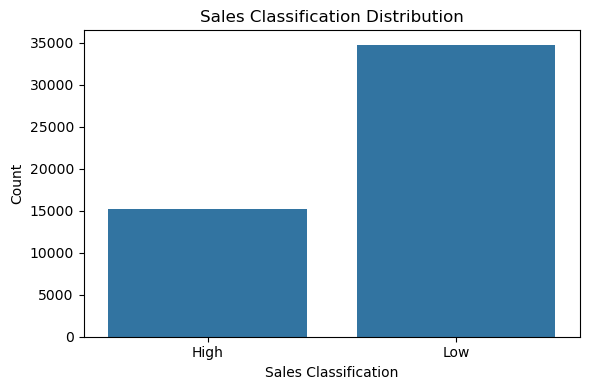

In [13]:
# Plot sales classification distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sales_Classification', data=df)
plt.title("Sales Classification Distribution")
plt.xlabel("Sales Classification")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

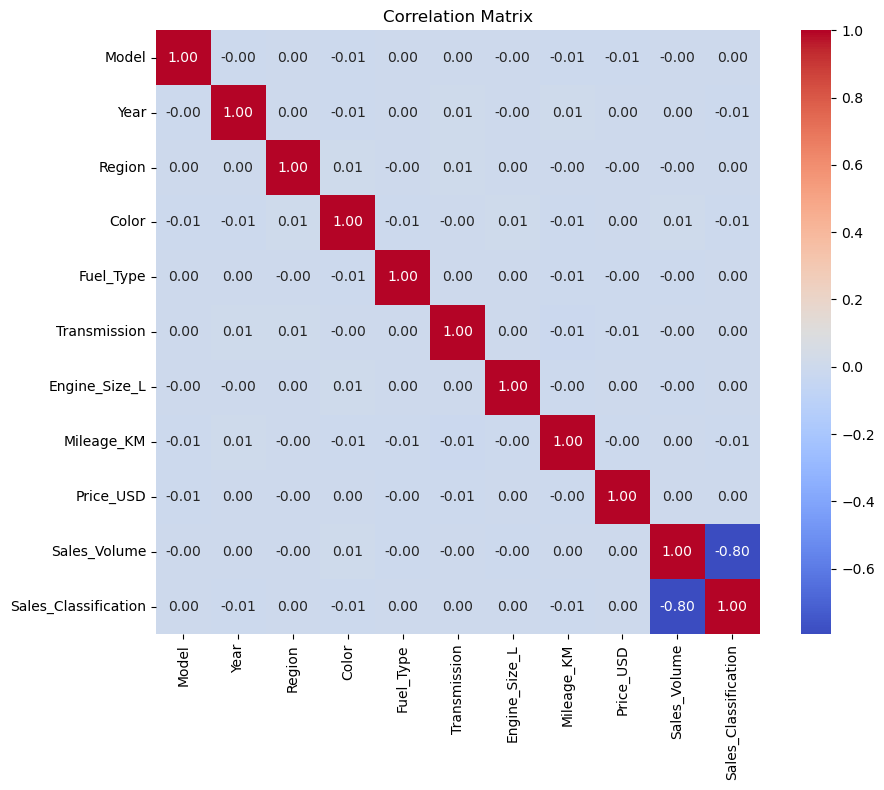

In [15]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()